In [1]:
#outliers are extreme values

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:

salary = [11, 40, 45, 68, 65, 68, 78, 90, 57, 74, 91, 92, 88, 68, 57, 48, 99, 101, 68, 77, 110, 140]

In [4]:
salary

[11,
 40,
 45,
 68,
 65,
 68,
 78,
 90,
 57,
 74,
 91,
 92,
 88,
 68,
 57,
 48,
 99,
 101,
 68,
 77,
 110,
 140]

In [5]:
#five point summary
#min, 25th, 50th percentile, 75th percentile 100th percentile

In [6]:
np.quantile(salary, [0, 0.25, 0.50, 0.75, 1])

array([ 11.  ,  59.  ,  71.  ,  90.75, 140.  ])

In [7]:
df = pd.DataFrame(salary, columns = ['Salary'])

In [8]:
df.describe()

,Salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


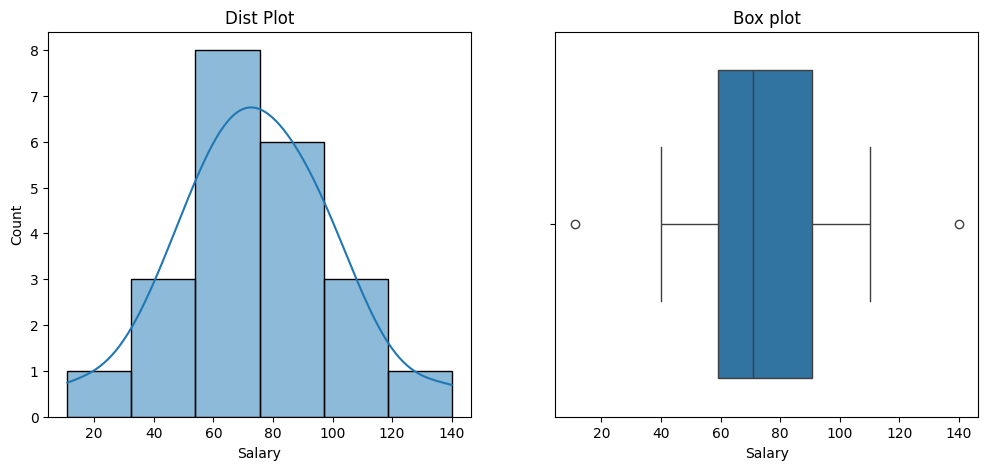

In [9]:
#To check outliers>> distplot, boxplot

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary'], kde = True)
plt.title("Dist Plot")


plt.subplot(1, 2, 2)
sns.boxplot(data=df, x = 'Salary')
plt.title("Box plot")
plt.show()

In [10]:
#here the distribution is not skewed as the outliers are present on both side
#In box plot, we see there are outliers

#dropping the outlier

#replace with mean and median

#capping the outlier

In [11]:
#dropping the outlier

In [12]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR

In [13]:
df_filtered = df[(df.Salary >= lower_fence) & (df.Salary <= upper_fence)]

In [14]:
df.shape

(22, 1)

In [15]:
df_filtered.shape

(20, 1)

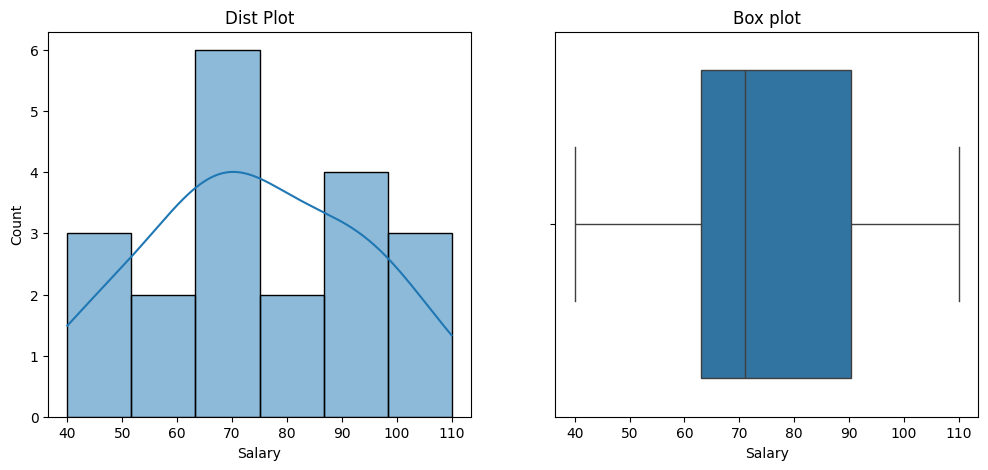

In [16]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_filtered['Salary'], kde = True)
plt.title("Dist Plot")


plt.subplot(1, 2, 2)
sns.boxplot(data=df_filtered, x = 'Salary')
plt.title("Box plot")
plt.show()

In [17]:
#imputation with mean
df['Salary_impuuted_mean'] = np.where((df.Salary >= upper_fence) | (df.Salary <= lower_fence), df['Salary'].mean(), df['Salary'])

In [18]:
df

,Salary,Salary_impuuted_mean
0,11,74.318182
1,40,40.000000
2,45,45.000000
3,68,68.000000
4,65,65.000000
5,68,68.000000
6,78,78.000000
7,90,90.000000
8,57,57.000000
9,74,74.000000


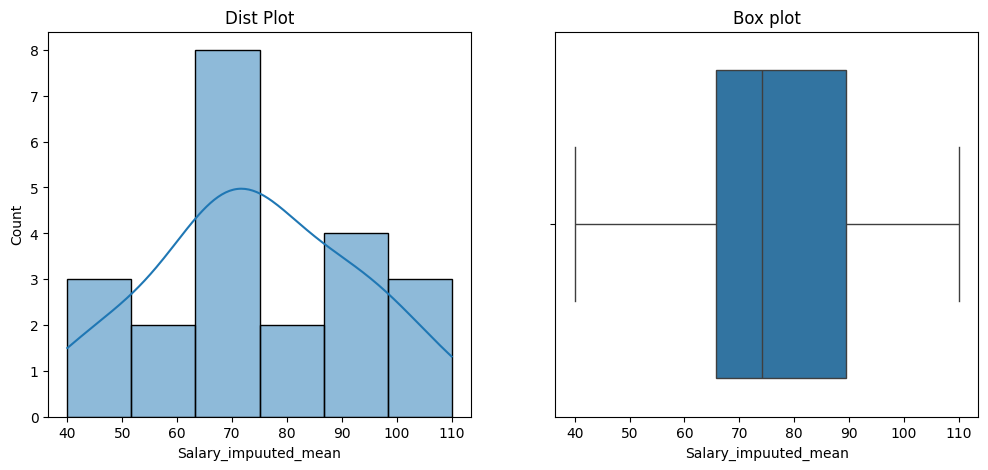

In [19]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary_impuuted_mean'], kde = True)
plt.title("Dist Plot")


plt.subplot(1, 2, 2)
sns.boxplot(data=df, x = 'Salary_impuuted_mean')
plt.title("Box plot")
plt.show()

In [20]:
#imputation with median
df['Salary_impuuted_median'] = np.where((df.Salary >= upper_fence) | (df.Salary <= lower_fence), df['Salary'].median(), df['Salary'])

In [21]:
df

,Salary,Salary_impuuted_mean,Salary_impuuted_median
0,11,74.318182,71.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


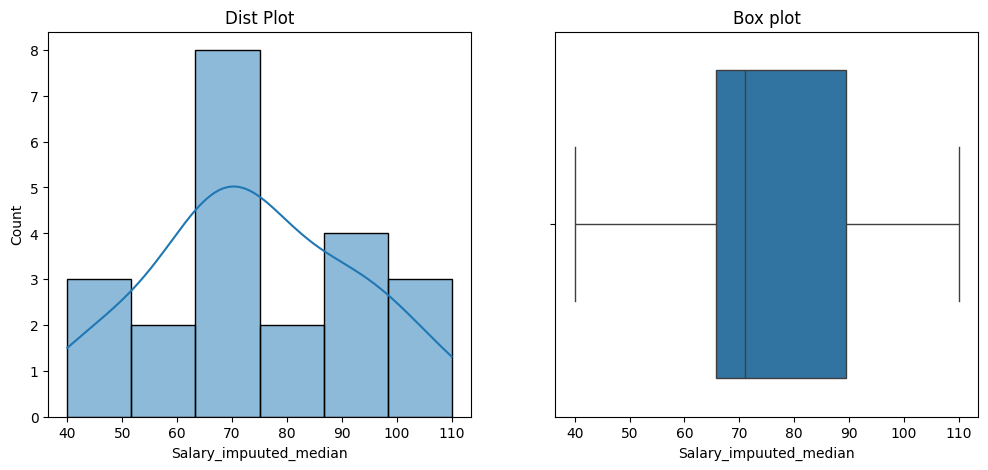

In [22]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary_impuuted_median'], kde = True)
plt.title("Dist Plot")


plt.subplot(1, 2, 2)
sns.boxplot(data=df, x = 'Salary_impuuted_median')
plt.title("Box plot")
plt.show()

In [23]:
#capping >> replacing the nearest value which is not outlier
df

,Salary,Salary_impuuted_mean,Salary_impuuted_median
0,11,74.318182,71.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


In [24]:
lower_cap = df['Salary'].quantile(0.05) #lower cao is 5th percentile
upper_cap = df['Salary'].quantile(0.95) #upper cap as 95th percentile

In [25]:
lower_cap

40.25

In [26]:
upper_cap

109.55

In [27]:
#replace outliers with cap
# where(condition, [x, y], /)
# Return elements chosen from `x` or `y` depending on `condition`.
#if df['Salary'] < lower_cap satisfied then lower_cap and df['Salary']>upper_cap satisfied then upper_cap
#otherwise keep Salary as it is
df["Salary_capped"] = np.where(df['Salary'] < lower_cap, lower_cap,
        np.where(df['Salary']>upper_cap, upper_cap, df['Salary']))

In [28]:
df

,Salary,Salary_impuuted_mean,Salary_impuuted_median,Salary_capped
0,11,74.318182,71.0,40.25
1,40,40.000000,40.0,40.25
2,45,45.000000,45.0,45.00
3,68,68.000000,68.0,68.00
4,65,65.000000,65.0,65.00
5,68,68.000000,68.0,68.00
6,78,78.000000,78.0,78.00
7,90,90.000000,90.0,90.00
8,57,57.000000,57.0,57.00
9,74,74.000000,74.0,74.00


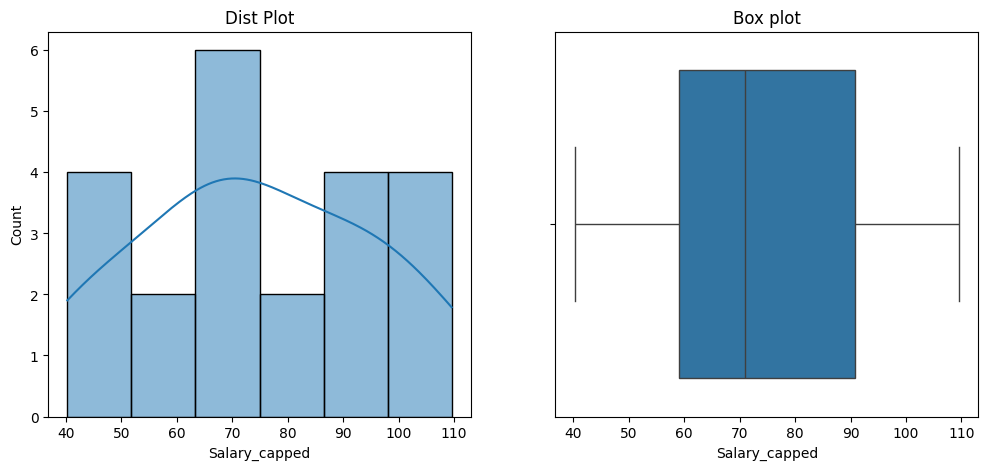

In [29]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary_capped'], kde = True)
plt.title("Dist Plot")


plt.subplot(1, 2, 2)
sns.boxplot(data=df, x = 'Salary_capped')
plt.title("Box plot")
plt.show()